In [ ]:
import pandas as pd
from unidecode import unidecode

: 

In [22]:
df = pd.read_csv('data/tracks.csv', parse_dates=['release_date'])

In [23]:
# Tratando a string como lista e pegando o primeiro artista principal
from ast import literal_eval
df['artist'] = df['artists'].apply(lambda x: literal_eval(x)[0])

In [24]:
entries = pd.read_csv('data/billboard_hot_100_definitive.csv', parse_dates=['date'])

In [ ]:
df['name'] = df['name'].apply(unidecode)
df['artist'] = df['artist'].apply(unidecode)

: 

<AxesSubplot:>

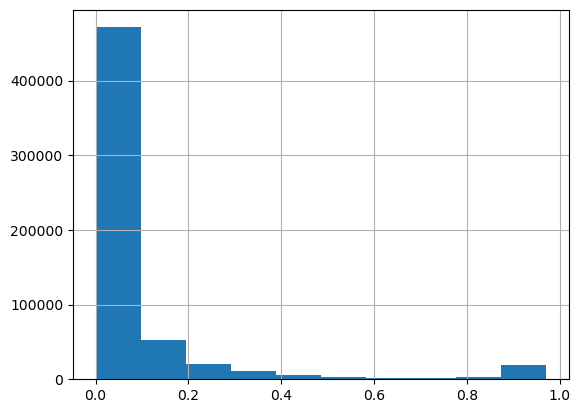

In [ ]:
df['speechiness'].hist()

<AxesSubplot:>

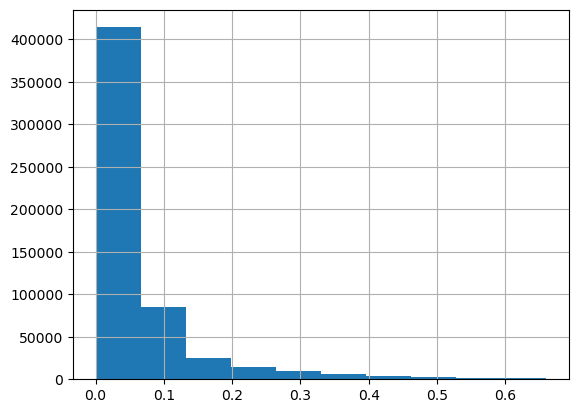

In [ ]:
df = df[df['speechiness'] <= 0.66]
df['speechiness'].hist()

In [ ]:
billboard = entries.sort_values('date', ascending=False)
billboard['cumulative_artist_appearances'] = billboard.groupby('artist').cumcount(ascending=False)
billboard = billboard.sort_values(by=['date'], ascending=False).drop_duplicates(['name', 'artist'], keep='first')
billboard.loc[billboard['artist'] == 'Big Time Rush']

,name,artist,rank,weeks,date,cumulative_artist_appearances
49496,Windows Down,Big Time Rush,97,1,2012-07-14,13
55290,Boyfriend,Big Time Rush,91,11,2011-06-04,12
57278,Big Night,Big Time Rush,79,1,2011-01-15,1
60792,Halfway There,Big Time Rush,93,1,2010-05-15,0


In [ ]:
# Por alguma razão, algumas músicas aparecem repetidas diversas vezes com 
# variações mínimas nas features de audio, portanto é necessario filtra-las
new_df = df.sort_values(by='release_date').drop_duplicates(['name', 'artist'], keep='first')
new_df.loc[(df['artist'] == 'Big Time Rush')][['name', 'artist', 'release_date']]

,name,artist,release_date
84002,Any Kind of Guy,Big Time Rush,2010-02-02
156379,Big Time Rush,Big Time Rush,2010-04-09
397551,Halfway There,Big Time Rush,2010-04-27
397586,Famous,Big Time Rush,2010-06-29
397592,City Is Ours,Big Time Rush,2010-08-03
119203,Boyfriend,Big Time Rush,2010-10-11
119206,Worldwide,Big Time Rush,2010-10-11
468010,Count On You (feat. Jordin Sparks),Big Time Rush,2010-10-11
119209,Til I Forget About You,Big Time Rush,2010-10-11
468082,Windows Down,Big Time Rush,2011-01-01


In [ ]:
new_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist
478627,74CSJTE5QQp1e4bHzm3wti,Maldita sea la primera vez,19,233920,0,['Los Pincheira del Sur'],['1BnQrx8p0bHBpidjIGq26z'],1900-01-01,0.659,0.791,...,-4.895,1,0.0295,0.13900,0.000002,0.1610,0.956,141.999,4,Los Pincheira del Sur
132355,3KfDZww1OqQK8yUiYpSkyX,Jeannine,0,176218,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922-01-01,0.146,0.635,...,-7.811,0,0.0458,0.99000,0.797000,0.5240,0.443,83.640,4,Abe Lyman's Orchestra
132356,3MgGOqoHw1N0TQaL8gAoI3,On the Alamo,0,207177,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",1922-01-01,0.280,0.482,...,-5.019,1,0.0351,0.99500,0.770000,0.2340,0.520,175.163,4,Isham Jones & His Orchestra
132357,3PRlEUrQt8fn3xx6oxU30W,Trees,0,187977,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",1922-01-01,0.275,0.426,...,-4.738,1,0.0335,0.98200,0.115000,0.1080,0.695,182.528,4,Isham Jones & His Orchestra
132358,3VQ7wFSgcU6ULI8SfAqI8R,Never swat a fly,0,151402,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922-01-01,0.451,0.648,...,-5.570,1,0.0697,0.96100,0.858000,0.4460,0.864,204.310,4,Abe Lyman's Orchestra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94098,08lHFwOBB8FnLwzuGwYMEh,Relationship,0,215307,0,"['Young Thug', 'Future']","['50co4Is1HCEo8bhOyUWKpn', '1RyvyyTE3xzB2ZywiA...",2021-04-16,0.841,0.595,...,-6.337,1,0.0624,0.00250,0.000000,0.1200,0.300,145.995,4,Young Thug
94099,1bAaKcgyFcG8ZwnlEQBy1W,Hot,0,193027,0,"['Young Thug', 'Gunna']","['50co4Is1HCEo8bhOyUWKpn', '2hlmm7s2ICUX0LVIhV...",2021-04-16,0.855,0.651,...,-8.044,0,0.2340,0.06360,0.000000,0.0772,0.559,111.992,4,Young Thug
94100,4uQgzXvYErWzSXpCoGCCDa,Millions,0,157520,0,['Young Thug'],['50co4Is1HCEo8bhOyUWKpn'],2021-04-16,0.942,0.531,...,-7.510,1,0.2150,0.00236,0.000109,0.0812,0.739,99.027,4,Young Thug
94112,4jn46ybhkesIbUdPNGqqpP,WAP,0,187541,0,"['Cardi B', 'Megan Thee Stallion']","['4kYSro6naA4h99UJvo89HB', '181bsRPaVXVlUKXrxw...",2021-04-16,0.935,0.454,...,-7.509,1,0.3750,0.01940,0.000000,0.0824,0.357,133.073,4,Cardi B


## Construção da feature de aparições prévias de um artista no lançamento da música

In [ ]:
# merged_df = pd.merge(df, sanitized_entries, how='left', on=['name', 'artist']).drop(columns=['id', 'artists', 'id_artists', 'popularity','time_signature']).drop_duplicates(['name', 'artist'], keep='first').reset_index(drop=True)
merged_df = pd.merge(new_df, billboard, how='left', on=['name', 'artist']).drop(columns=['id', 'artists', 'id_artists', 'popularity']).reset_index(drop=True)
merged_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,Maldita sea la primera vez,233920,0,1900-01-01,0.659,0.791,2,-4.895,1,0.0295,...,0.000002,0.1610,0.956,141.999,4,Los Pincheira del Sur,NaN,NaN,NaT,NaN
1,Jeannine,176218,0,1922-01-01,0.146,0.635,8,-7.811,0,0.0458,...,0.797000,0.5240,0.443,83.640,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
2,On the Alamo,207177,0,1922-01-01,0.280,0.482,9,-5.019,1,0.0351,...,0.770000,0.2340,0.520,175.163,4,Isham Jones & His Orchestra,NaN,NaN,NaT,NaN
3,Trees,187977,0,1922-01-01,0.275,0.426,2,-4.738,1,0.0335,...,0.115000,0.1080,0.695,182.528,4,Isham Jones & His Orchestra,NaN,NaN,NaT,NaN
4,Never swat a fly,151402,0,1922-01-01,0.451,0.648,5,-5.570,1,0.0697,...,0.858000,0.4460,0.864,204.310,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501050,Relationship,215307,0,2021-04-16,0.841,0.595,2,-6.337,1,0.0624,...,0.000000,0.1200,0.300,145.995,4,Young Thug,81.0,14.0,2017-12-09,72.0
501051,Hot,193027,0,2021-04-16,0.855,0.651,0,-8.044,0,0.2340,...,0.000000,0.0772,0.559,111.992,4,Young Thug,46.0,26.0,2020-02-22,119.0
501052,Millions,157520,0,2021-04-16,0.942,0.531,1,-7.510,1,0.2150,...,0.000109,0.0812,0.739,99.027,4,Young Thug,NaN,NaN,NaT,NaN
501053,WAP,187541,0,2021-04-16,0.935,0.454,1,-7.509,1,0.3750,...,0.000000,0.0824,0.357,133.073,4,Cardi B,50.0,24.0,2021-01-30,208.0


In [ ]:
# Pega todas as entradas que não são nulas
billboard_entries_df = merged_df[~merged_df['weeks'].isna()].reset_index(drop=True)
billboard_entries_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,I'll Be Seeing You,184093,0,1939-01-01,0.333,0.180,2,-10.083,1,0.0360,...,0.004770,0.2260,0.350,172.680,3,Frank Sinatra,79.0,7.0,1961-11-27,63.0
1,White Christmas,177480,0,1942-01-01,0.317,0.158,9,-16.485,1,0.0381,...,0.353000,0.3380,0.247,130.503,3,Bing Crosby,21.0,24.0,2022-01-01,29.0
2,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.373,9,-12.990,0,0.0932,...,0.000011,0.1030,0.493,79.855,4,Bill Withers,22.0,16.0,1971-10-30,15.0
3,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.224,3,-12.431,1,0.0935,...,0.000000,0.2840,0.620,202.481,4,Bing Crosby,36.0,1.0,2021-01-02,23.0
4,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.146,4,-16.084,0,0.0321,...,0.000000,0.2560,0.176,84.041,4,Bing Crosby,50.0,1.0,2021-01-02,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10141,Cry Baby,137984,0,2021-04-16,0.957,0.437,11,-7.882,1,0.3590,...,0.000000,0.2190,0.616,130.058,4,Megan Thee Stallion,55.0,20.0,2021-05-01,144.0
10142,Relationship,215307,0,2021-04-16,0.841,0.595,2,-6.337,1,0.0624,...,0.000000,0.1200,0.300,145.995,4,Young Thug,81.0,14.0,2017-12-09,72.0
10143,Hot,193027,0,2021-04-16,0.855,0.651,0,-8.044,0,0.2340,...,0.000000,0.0772,0.559,111.992,4,Young Thug,46.0,26.0,2020-02-22,119.0
10144,WAP,187541,0,2021-04-16,0.935,0.454,1,-7.509,1,0.3750,...,0.000000,0.0824,0.357,133.073,4,Cardi B,50.0,24.0,2021-01-30,208.0


In [ ]:
billboard_entries_df.loc[billboard_entries_df['artist'] == 'Big Time Rush']

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
8145,Halfway There,205760,0,2010-04-27,0.481,0.925,3,-2.861,1,0.102,...,0.0,0.1200,0.318,143.079,4,Big Time Rush,93.0,1.0,2010-05-15,0.0
8181,Boyfriend,201040,0,2010-10-11,0.614,0.857,1,-4.171,0,0.111,...,0.0,0.1770,0.677,164.146,4,Big Time Rush,91.0,11.0,2011-06-04,12.0
8264,Windows Down,192933,0,2011-01-01,0.619,0.931,11,-3.440,0,0.068,...,0.0,0.0996,0.820,129.957,4,Big Time Rush,97.0,1.0,2012-07-14,13.0


## lixo de teste

In [ ]:
sanitized_billboard_entries_df = billboard_entries_df.sort_values(by=['artist', 'cumulative_artist_appearances'], ascending=False).copy()
# sanitized_billboard_entries_df['previous_song'] = sanitized_billboard_entries_df['name'].shift(-1)
# sanitized_billboard_entries_df = sanitized_billboard_entries_df[(sanitized_billboard_entries_df['previous_song'] != sanitized_billboard_entries_df['name']) & (sanitized_billboard_entries_df['cumulative_artist_appearances'] != 0)]
# # Necessário para casos em que um artista tem mais de uma música no top 100 como é o caso de Ariana Grande, Drake etc.
# sanitized_billboard_entries_df = sanitized_billboard_entries_df.drop_duplicates(['name', 'artist'], keep='first')
# sanitized_billboard_entries_df = sanitized_billboard_entries_df[['name', 'artist', 'release_date', 'date', 'cumulative_artist_appearances']].sort_values(by=['date'], ascending=False)
sanitized_billboard_entries_df.drop_duplicates(['name', 'artist', 'cumulative_artist_appearances']).loc[sanitized_billboard_entries_df['artist'] == 'Big Time Rush'].to_csv('data/sanitized_billboard_entries.csv', index=False)

In [68]:
billboard_entries_df.loc[billboard_entries_df['artist'] == 'BTS']

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
138420,MIC Drop,238193,0,2017-09-18,0.667,0.889,6,-4.851,1,0.0918,...,0.0,0.0816,0.541,169.959,4,BTS,98.0,10.0,2018-02-10,12.0
138421,MIC Drop,238193,0,2017-09-18,0.667,0.889,6,-4.851,1,0.0918,...,0.0,0.0816,0.541,169.959,4,BTS,84.0,9.0,2018-02-03,11.0
138422,MIC Drop,238193,0,2017-09-18,0.667,0.889,6,-4.851,1,0.0918,...,0.0,0.0816,0.541,169.959,4,BTS,79.0,8.0,2018-01-27,10.0
138423,MIC Drop,238193,0,2017-09-18,0.667,0.889,6,-4.851,1,0.0918,...,0.0,0.0816,0.541,169.959,4,BTS,74.0,7.0,2018-01-20,9.0
138424,MIC Drop,238193,0,2017-09-18,0.667,0.889,6,-4.851,1,0.0918,...,0.0,0.0816,0.541,169.959,4,BTS,66.0,6.0,2018-01-13,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147070,Fly To My Room,222243,0,2020-11-20,0.764,0.526,11,-7.355,1,0.2120,...,0.0,0.0718,0.588,114.910,4,BTS,69.0,1.0,2020-12-05,55.0
147071,Telepathy,202313,0,2020-11-20,0.787,0.669,5,-4.333,0,0.0428,...,0.0,0.1230,0.570,104.994,4,BTS,70.0,1.0,2020-12-05,56.0
147072,Life Goes On,207481,0,2020-11-20,0.566,0.716,1,-5.733,1,0.0424,...,0.0,0.3700,0.450,81.068,4,BTS,93.0,3.0,2020-12-19,60.0
147073,Life Goes On,207481,0,2020-11-20,0.566,0.716,1,-5.733,1,0.0424,...,0.0,0.3700,0.450,81.068,4,BTS,28.0,2.0,2020-12-12,57.0


In [107]:
# Filtra as ocorrências em que a data de lançamento é posterior a data de entrada na billboard
# é necessário para deixar apenas as músicas que entraram na billboard após o lançamento
# billboard_entries_df2 = billboard_entries_df[billboard_entries_df['date'] < billboard_entries_df['release_date']]
# billboard2 = billboard_entries_df2.groupby(['name', 'artist'], as_index=False).apply(lambda x: x.loc[x['cumulative_artist_appearances'].idxmax()])
# billboard2.loc[billboard2['artist'] == 'Dua Lipa'][['name', 'artist', 'cumulative_artist_appearances', 'release_date', 'date']].sort_values('cumulative_artist_appearances', ascending=False)
# billboard2[['name', 'artist', 'cumulative_artist_appearances', 'release_date', 'date']].sort_values('cumulative_artist_appearances', ascending=False)
# billboard2.loc[billboard2['artist'] == 'Mariah Carey'][['name', 'artist', 'cumulative_artist_appearances', 'release_date', 'date']].sort_values('cumulative_artist_appearances', ascending=False)
# billboard2.hist(column='cumulative_artist_appearances')
# billboard2[['name', 'artist', 'cumulative_artist_appearances', 'release_date', 'date']].sort_values('cumulative_artist_appearances', ascending=False)
# billboard2.loc[billboard2['artist'] == 'Big Time Rush']
# billboard_entries_df.loc[billboard_entries_df['artist'] == 'Big Time Rush'][['name', 'artist', 'cumulative_artist_appearances', 'release_date', 'date']]
btr = billboard_entries_df.loc[billboard_entries_df['artist'] == 'Big Time Rush'][['name', 'artist', 'cumulative_artist_appearances', 'release_date', 'date']]

# btr[(btr['cumulative_artist_appearances'] == 0) & (btr['date'] < btr['release_date']) & (btr['name'] == btr['previous_song'])]
btr2 = btr.sort_values('cumulative_artist_appearances', ascending=False)
btr2['previous_song'] = btr2['name'].shift(-1)
# filtered_df = df[(df['cumulative_artist_appearances'] == 0) & (df['date'] < df['release_date']) & (df['name'] == df['previous_song'])]
btr2[(btr2['cumulative_artist_appearances'] != 0) & (btr2['name'] != btr2['previous_song'])]
# btr2[(btr2['cumulative_artist_appearances'] != 0) & (btr2['name'] != btr2['previous_song']) & (btr2['date'] < btr2['release_date'])]
# btr2

,name,artist,cumulative_artist_appearances,release_date,date,previous_song
33733,Windows Down,Big Time Rush,13.0,2011-01-01,2012-07-14,Boyfriend
32016,Boyfriend,Big Time Rush,2.0,2011-07-08,2011-03-12,Halfway There


In [ ]:
# Agora com a feature em mãos é necessário fazer uma transformação em que
# todas as músicas com valor 0 sejam removidas e as demais tenham seu valor
# transformado em log10


## Final touches before prediction

In [26]:
billboard_entries_df['famous_before_release'] = billboard_entries_df.apply(lambda x: 1 if x['cumulative_artist_appearances'] > 0 else 0, axis=1)
billboard_entries_df.loc[billboard_entries_df['artist'] == 'Big Time Rush'][['name', 'artist', 'cumulative_artist_appearances', 'release_date', 'date', 'famous_before_release']].sort_values('cumulative_artist_appearances', ascending=False)

,name,artist,cumulative_artist_appearances,release_date,date,famous_before_release
8264,Windows Down,Big Time Rush,13.0,2011-01-01,2012-07-14,1
8181,Boyfriend,Big Time Rush,12.0,2010-10-11,2011-06-04,1
8145,Halfway There,Big Time Rush,0.0,2010-04-27,2010-05-15,0


In [27]:
total_in_billboard = len(merged_df[~merged_df['weeks'].isna()])
total_in_billboard

10146

In [28]:
len(merged_df)

501055

In [29]:
unsuccessful_df = merged_df[merged_df['weeks'].isna()].reset_index(drop=True)
unsuccessful_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,Maldita sea la primera vez,233920,0,1900-01-01,0.659,0.791,2,-4.895,1,0.0295,...,0.000002,0.1610,0.956,141.999,4,Los Pincheira del Sur,NaN,NaN,NaT,NaN
1,Jeannine,176218,0,1922-01-01,0.146,0.635,8,-7.811,0,0.0458,...,0.797000,0.5240,0.443,83.640,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
2,On the Alamo,207177,0,1922-01-01,0.280,0.482,9,-5.019,1,0.0351,...,0.770000,0.2340,0.520,175.163,4,Isham Jones & His Orchestra,NaN,NaN,NaT,NaN
3,Trees,187977,0,1922-01-01,0.275,0.426,2,-4.738,1,0.0335,...,0.115000,0.1080,0.695,182.528,4,Isham Jones & His Orchestra,NaN,NaN,NaT,NaN
4,Never swat a fly,151402,0,1922-01-01,0.451,0.648,5,-5.570,1,0.0697,...,0.858000,0.4460,0.864,204.310,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490904,This Time Around,162820,0,2021-04-16,0.775,0.656,6,-4.724,0,0.0732,...,0.000001,0.1420,0.755,157.010,4,Wiz Khalifa,NaN,NaN,NaT,NaN
490905,2013 Will Be My Year,161045,0,2021-04-16,0.347,0.965,10,-6.014,1,0.1420,...,0.000000,0.3430,0.392,90.987,4,Jay and Others :>,NaN,NaN,NaT,NaN
490906,The Sky's the Limit,205867,0,2021-04-16,0.743,0.877,0,-3.600,1,0.0360,...,0.000000,0.3200,0.712,125.017,4,Jason Derulo,NaN,NaN,NaT,NaN
490907,Tu Verdad,205120,0,2021-04-16,0.777,0.642,11,-6.657,0,0.0566,...,0.000015,0.1780,0.589,115.930,4,J Balvin,NaN,NaN,NaT,NaN


In [30]:
samples_df = unsuccessful_df.sample(n=total_in_billboard, random_state=2023)
samples_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
172725,La Califusa - Remastered,181253,0,1983-01-01,0.490,0.965,4,-3.757,1,0.0959,...,0.000025,0.6630,0.505,98.148,4,Australian Crawl,NaN,NaN,NaT,NaN
414943,พูดไม่คิด (Golden Mix),274000,0,2013-12-04,0.787,0.907,5,-5.358,0,0.0397,...,0.054800,0.0733,0.758,114.014,4,Season Five,NaN,NaN,NaT,NaN
180158,Menea el bullarengue,132933,0,1984-01-01,0.659,0.924,7,-5.822,1,0.0510,...,0.965000,0.0184,0.894,98.582,4,Siniestro Total,NaN,NaN,NaT,NaN
144776,A Sede Do Peixe (Para O Que Não Tem Solução),146200,0,1978-01-02,0.554,0.439,3,-11.019,1,0.0280,...,0.000209,0.1310,0.783,146.565,4,Milton Nascimento,NaN,NaN,NaT,NaN
128377,California,222889,0,1975-01-01,0.707,0.637,2,-7.580,0,0.0609,...,0.053300,0.1110,0.909,91.110,4,The Impossibles,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121010,Bądź słońcem,218413,0,1974-01-01,0.511,0.440,2,-9.610,1,0.0302,...,0.028400,0.1450,0.528,124.225,4,Breakout,NaN,NaN,NaT,NaN
237771,La Botella,187360,0,1992-01-01,0.767,0.328,7,-13.360,1,0.0435,...,0.000000,0.1500,0.939,111.864,4,Lucho Barrios,NaN,NaN,NaT,NaN
358577,Tua mamma,222227,0,2006-10-13,0.748,0.885,10,-5.574,0,0.0535,...,0.000000,0.0915,0.901,102.021,4,J-AX,NaN,NaN,NaT,NaN
326198,Buz Dağları,244587,0,2002-02-02,0.603,0.769,10,-10.317,0,0.3480,...,0.000000,0.2230,0.563,174.082,4,Ceza,NaN,NaN,NaT,NaN


In [23]:
concatenated_df = pd.concat([billboard_entries_df, samples_df]).reset_index(drop=True)
# concatenated_df.columns
# concatenated_df['weeks'].fillna(0, inplace=True)
concatenated_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances,famous_before_release
0,I'll Be Seeing You,184093,0,1939-01-01,0.333,0.180,2,-10.083,1,0.0360,...,0.2260,0.350,172.680,3,Frank Sinatra,79.0,7.0,1961-11-27,63.0,1.0
1,White Christmas,177480,0,1942-01-01,0.317,0.158,9,-16.485,1,0.0381,...,0.3380,0.247,130.503,3,Bing Crosby,21.0,24.0,2022-01-01,29.0,1.0
2,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.373,9,-12.990,0,0.0932,...,0.1030,0.493,79.855,4,Bill Withers,22.0,16.0,1971-10-30,15.0,1.0
3,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.224,3,-12.431,1,0.0935,...,0.2840,0.620,202.481,4,Bing Crosby,36.0,1.0,2021-01-02,23.0,1.0
4,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.146,4,-16.084,0,0.0321,...,0.2560,0.176,84.041,4,Bing Crosby,50.0,1.0,2021-01-02,25.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20083,Jakoba,91714,0,2020-07-02,0.670,0.116,1,-12.629,0,0.1050,...,0.0941,0.284,178.132,4,Lanre Kobina,NaN,NaN,NaT,NaN,NaN
20084,Bereft,205357,0,1982-01-01,0.822,0.573,4,-12.629,0,0.0328,...,0.0874,0.919,127.939,4,Mogo homo,NaN,NaN,NaT,NaN,NaN
20085,Mabel's Fatal Fable,292267,0,1988-08-08,0.204,0.817,4,-12.623,0,0.0839,...,0.3350,0.329,104.532,4,Jason Becker,NaN,NaN,NaT,NaN,NaN
20086,Disparo al Corazón,196320,0,2016-09-26,0.651,0.653,2,-6.277,0,0.0633,...,0.2190,0.828,82.959,4,Lucas Sugo,NaN,NaN,NaT,NaN,NaN


In [ ]:
filtered_data = concatenated_df[concatenated_df['weeks'] != 0]

# Get the count of songs with weeks different than 0 for each artist
song_count = filtered_data['artist'].value_counts()
song_count

Drake                         91
Taylor Swift                  82
Justin Bieber                 52
The Weeknd                    42
Stevie Wonder                 42
                              ..
The Friends Of Distinction     1
Zendaya                        1
MAGIC!                         1
Herbie Mann                    1
Krewella                       1
Name: artist, Length: 2920, dtype: int64

## Hit song prediction

In [ ]:
concatenated_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks,release_year
0,White Christmas,177480,0,1942-01-01,0.317,0.158,9,-16.485,1,0.0381,0.673,0.353000,0.3380,0.247,130.503,Bing Crosby,24.0,1942
1,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.373,9,-12.990,0,0.0932,0.446,0.000011,0.1030,0.493,79.855,Bill Withers,16.0,1942
2,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.224,3,-12.431,1,0.0935,0.646,0.000000,0.2840,0.620,202.481,Bing Crosby,1.0,1945
3,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.146,4,-16.084,0,0.0321,0.281,0.000000,0.2560,0.176,84.041,Bing Crosby,1.0,1945
4,The Children's Marching Song (Nick Nack Paddy ...,166867,0,1950-01-01,0.712,0.856,2,-9.457,1,0.0332,0.636,0.000000,0.1680,0.934,97.431,Mitch Miller,14.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,Ku Godt,208000,0,2012-01-01,0.544,0.930,2,-4.484,1,0.1460,0.161,0.000000,0.2290,0.405,81.485,KESI,0.0,2012
20082,The More I See You,163240,0,1964-12-01,0.515,0.307,5,-15.254,1,0.0616,0.842,0.000000,0.0959,0.613,133.378,Monica Zetterlund,0.0,1964
20083,Idiot - Version 2011,188027,0,2010-11-19,0.732,0.827,11,-4.934,1,0.0355,0.172,0.000000,0.3520,0.774,129.993,Michelle,0.0,2010
20084,Antes,210280,0,1950-01-01,0.694,0.685,7,-9.191,1,0.0338,0.353,0.000004,0.1460,0.917,99.037,Yiyo y Los Chicos 10,0.0,1950


In [ ]:
hit_song_df = concatenated_df.copy()

In [24]:
hit_song_df = concatenated_df.copy()
### if it appears once in billboard hot 100 then it's a hit
hit_song_df['hit'] = hit_song_df['weeks'].apply(lambda x: 1 if x else 0)

# hit_song_df['artist'] = hit_song_df['weeks'].apply(get_category)

# Function to get the category of the artist
# def get_artist_category(row, song_count=song_count):
#     if row['artist'] not in song_count.index:
#         return 'Unknown'
#     else:
#         return get_category(song_count[row['artist']])

# hit_song_df['artist_category'] = hit_song_df.apply(lambda x: get_artist_category(x), axis=1)

# dummiees for most successful artists
# artist_dummies = pd.get_dummies(hit_song_df['artist_category'])
# hit_song_df = hit_song_df.drop(columns=['weeks', "name", "artist", "artist_category"])
# current_year = 2023
# hit_song_df['years_since_release'] = current_year - hit_song_df['release_year']
hit_song_df['famous_before_release'] = hit_song_df["famous_before_release"].fillna(0)
hit_song_df = hit_song_df.drop(columns=['weeks', "name", "artist", "release_date", "date", "cumulative_artist_appearances", "rank"])
# hit_song_df['artist_category'].value_counts()
hit_song_df

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,rank,famous_before_release,hit
0,184093,0,0.333,0.180,2,-10.083,1,0.0360,0.951,0.004770,0.2260,0.350,172.680,3,79.0,1.0,1
1,177480,0,0.317,0.158,9,-16.485,1,0.0381,0.673,0.353000,0.3380,0.247,130.503,3,21.0,1.0,1
2,124120,0,0.523,0.373,9,-12.990,0,0.0932,0.446,0.000011,0.1030,0.493,79.855,4,22.0,1.0,1
3,175333,0,0.500,0.224,3,-12.431,1,0.0935,0.646,0.000000,0.2840,0.620,202.481,4,36.0,1.0,1
4,175173,0,0.223,0.146,4,-16.084,0,0.0321,0.281,0.000000,0.2560,0.176,84.041,4,50.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20083,91714,0,0.670,0.116,1,-12.629,0,0.1050,0.581,0.869000,0.0941,0.284,178.132,4,NaN,0.0,1
20084,205357,0,0.822,0.573,4,-12.629,0,0.0328,0.675,0.004520,0.0874,0.919,127.939,4,NaN,0.0,1
20085,292267,0,0.204,0.817,4,-12.623,0,0.0839,0.130,0.835000,0.3350,0.329,104.532,4,NaN,0.0,1
20086,196320,0,0.651,0.653,2,-6.277,0,0.0633,0.240,0.000000,0.2190,0.828,82.959,4,NaN,0.0,1


In [53]:
hit_song_df.describe()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,rank,famous_before_release,hit
count,2.008800e+04,20088.000000,20088.000000,20088.000000,20088.000000,20088.000000,20088.000000,20088.000000,20088.000000,20088.000000,20088.00000,20088.000000,20088.000000,20088.000000,10044.000000,10044.000000,20088.0
mean,2.313077e+05,0.082686,0.583594,0.578786,5.248357,-9.495557,0.686181,0.088899,0.362570,0.069871,0.19774,0.570053,119.185334,3.899393,74.805456,0.994026,1.0
std,1.094417e+05,0.275414,0.161049,0.232677,3.551987,4.601313,0.464055,0.143568,0.327658,0.211638,0.16769,0.249389,29.313364,0.411276,22.991182,0.077062,0.0
min,1.718700e+04,0.000000,0.000000,0.000000,0.000000,-53.986000,0.000000,0.000000,0.000000,0.000000,0.00967,0.000000,0.000000,0.000000,2.000000,0.000000,1.0
25%,1.809698e+05,0.000000,0.481000,0.409000,2.000000,-12.002250,0.000000,0.033100,0.056100,0.000000,0.09360,0.371000,96.989750,4.000000,50.000000,1.000000,1.0
50%,2.207000e+05,0.000000,0.597000,0.597000,5.000000,-8.720500,1.000000,0.042700,0.265000,0.000011,0.13200,0.586000,117.769000,4.000000,84.000000,1.000000,1.0
75%,2.636210e+05,0.000000,0.698000,0.767000,8.000000,-6.086000,1.000000,0.070400,0.651000,0.001900,0.25400,0.778000,136.251500,4.000000,95.000000,1.000000,1.0
max,4.234947e+06,1.000000,0.988000,0.999000,11.000000,2.769000,1.000000,0.968000,0.996000,0.996000,0.99700,0.999000,216.304000,5.000000,100.000000,1.000000,1.0


In [54]:
hit_song_df['mode'].value_counts()

1    13784
0     6304
Name: mode, dtype: int64

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
hit_song_train_df, hit_song_test_df = train_test_split(hit_song_df, test_size=0.2, random_state=42)

In [ ]:
hit_song_X = hit_song_train_df.drop('hit', axis=1)
hit_song_y = hit_song_train_df['hit']

hit_song_X

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,years_since_release
15288,348667,0,0.571,0.573,2,-8.760,0,0.0372,0.6860,0.000004,0.0823,0.816,110.672,64
14734,225529,0,0.694,0.878,7,-8.806,1,0.1250,0.7660,0.036200,0.5470,0.810,92.466,38
2893,182533,0,0.880,0.367,5,-15.487,0,0.3160,0.2630,0.000071,0.0294,0.920,80.866,34
2608,255427,0,0.639,0.375,10,-11.148,1,0.0277,0.2640,0.000546,0.0872,0.116,126.421,37
13959,223911,1,0.596,0.361,9,-8.584,1,0.0900,0.3950,0.000003,0.0840,0.276,119.793,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,176493,0,0.565,0.854,11,-6.062,1,0.0308,0.0179,0.000004,0.1580,0.872,143.944,16
11964,230661,0,0.626,0.574,6,-5.276,1,0.0764,0.4800,0.000000,0.1030,0.575,163.800,11
5390,211667,0,0.628,0.698,6,-5.608,0,0.1050,0.0472,0.001430,0.0907,0.732,89.976,7
860,141160,0,0.464,0.741,10,-5.192,1,0.0466,0.6030,0.000000,0.0896,0.947,151.720,54


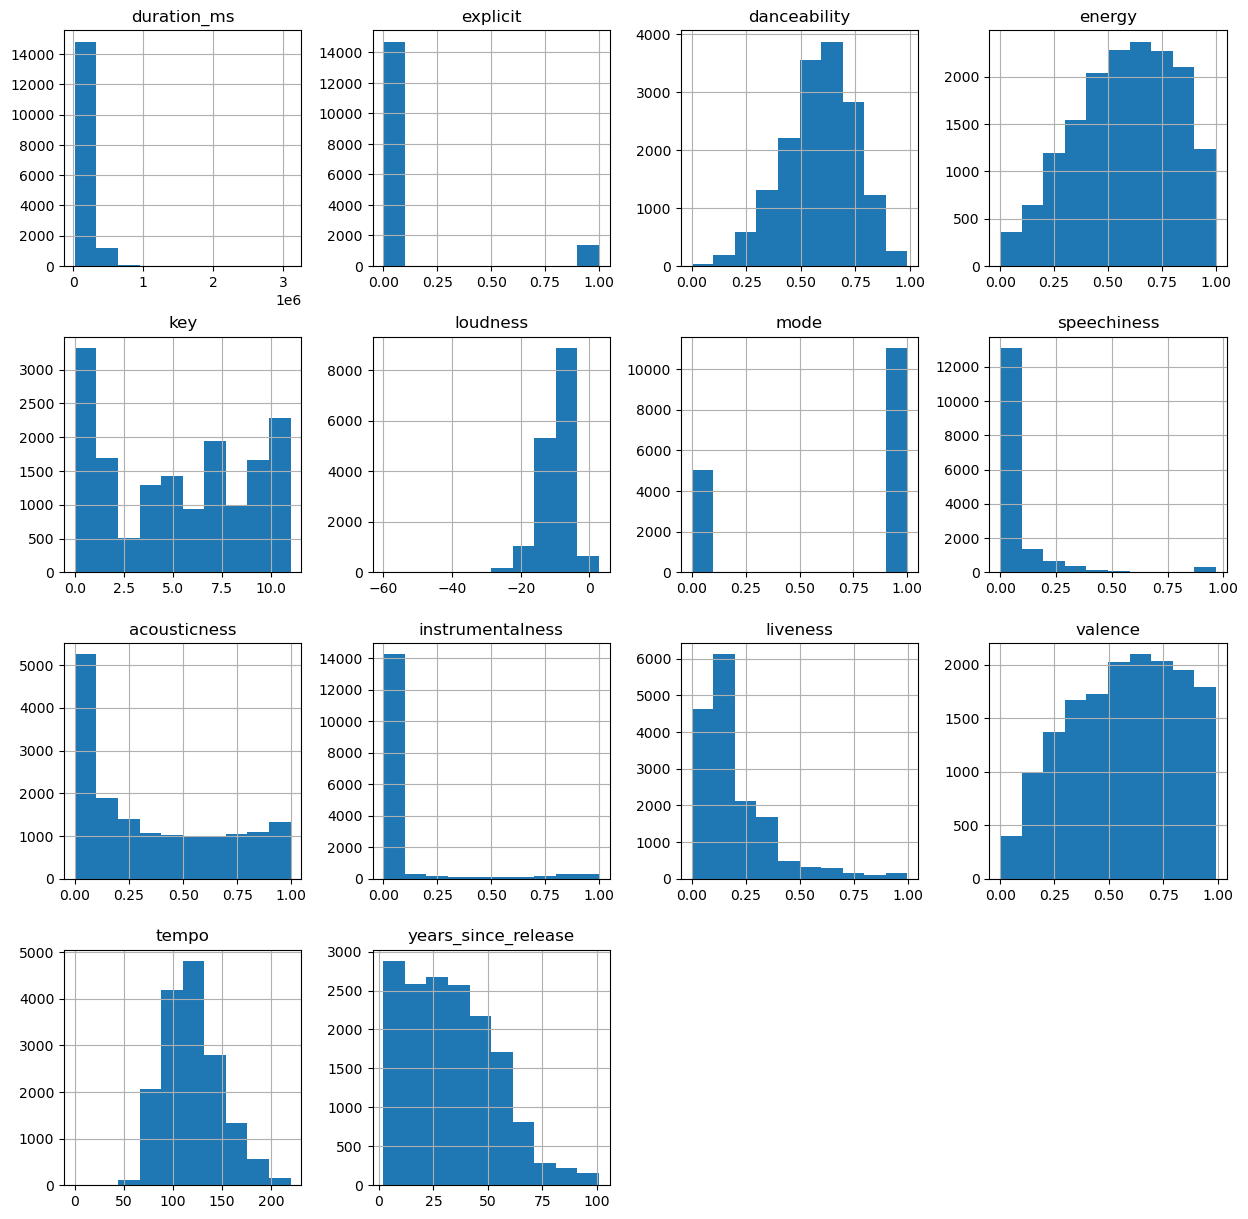

In [ ]:
_ = pd.DataFrame.hist(data=hit_song_X, figsize=[15,15])

### Checking correlation so that we can drop features to prevent dimensionality curse

<AxesSubplot:>

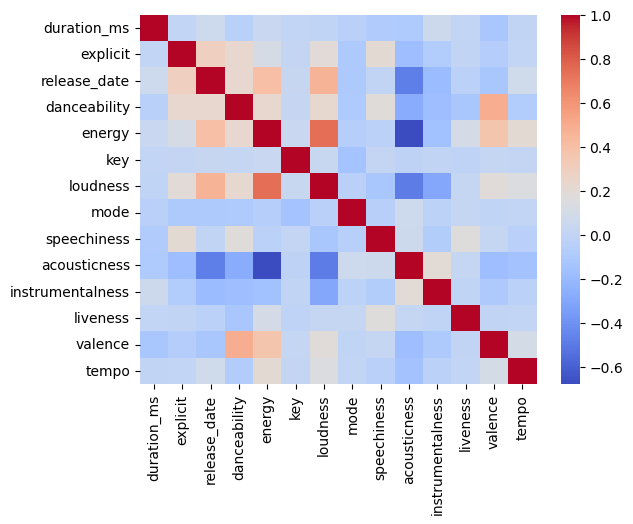

In [ ]:
correlation_matrix = hit_song_X.corr()
import seaborn as sns

sns.heatmap(correlation_matrix, cmap="coolwarm")

In [ ]:
corr_matrix = correlation_matrix[correlation_matrix != 1.0].dropna(axis=0, how='all').dropna(axis=1, how='all')
corr_pairs = corr_matrix.unstack()

# Sort the correlation pairs by their absolute value in descending order
sorted_pairs = corr_pairs.abs().sort_values(ascending=False)
sorted_pairs

energy            loudness            0.741171
loudness          energy              0.741171
energy            acousticness        0.680570
acousticness      energy              0.680570
loudness          acousticness        0.496227
                                        ...   
acousticness      acousticness             NaN
instrumentalness  instrumentalness         NaN
liveness          liveness                 NaN
valence           valence                  NaN
tempo             tempo                    NaN
Length: 196, dtype: float64

In [ ]:
# dropping one of the correlated features that has a correlation coefficient of 0.7 or higher
# hit_song_X = hit_song_X.drop(columns=['loudness'])

## Applying models

In [ ]:
import numpy as np
from scipy import stats
from sklearn.discriminant_analysis import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline


scaler = StandardScaler()
selector = SelectKBest(score_func=mutual_info_classif, k=20)
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=2023)


In [ ]:
# Testing adding artists again
# hit_song_X = pd.concat([hit_song_X, artist_dummies], axis=1)
# hit_song_X
hit_song_X.columns

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'years_since_release'],
      dtype='object')

In [ ]:
zR = DummyClassifier()

steps_zR = [('scaler', scaler), ('estimator', zR)]
pipeline_zR = Pipeline(steps_zR)
scores_zR = cross_val_score(pipeline_zR, hit_song_X, hit_song_y, cv=rkf, scoring='accuracy')
mean_zR = scores_zR.mean()
std_zR = scores_zR.std()
inf_zR, sup_zR = stats.norm.interval(0.95, loc=mean_zR, 
                               scale=std_zR/np.sqrt(len(scores_zR)))

print('zR')
print(f'Mean Accuracy: {mean_zR:.2f} Standard Deviation: {std_zR:.2f}')
print ('Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n' % 
       (inf_zR, sup_zR)) 

zR
Mean Accuracy: 0.50 Standard Deviation: 0.00
Accuracy Confidence Interval (95%): (0.50, 0.50)



### Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
steps_dt = [('scaler', scaler), ('estimator', dt)]
pipeline_dt = Pipeline(steps_dt)
grid_dt = {'estimator__max_depth': [None, 3, 5, 10]}
gs_dt = GridSearchCV(estimator=pipeline_dt, param_grid = grid_dt, 
                  scoring='accuracy', cv = 4)

gs_dt.fit(hit_song_X, hit_song_y)
test_predictions = gs_dt.predict(hit_song_test_df.drop('hit', axis=1))
hit_song_test_y = hit_song_test_df['hit']
test_accuracy = accuracy_score(hit_song_test_y, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')
# scores_dt = cross_val_score(gs_dt, hit_song_X, hit_song_y, scoring='accuracy', 
#                          cv = rkf)

# mean_dt = scores_dt.mean()
# std_dt = scores_dt.std()
# inf_dt, sup_dt = stats.norm.interval(0.95, loc=mean_dt, 
#                                scale=std_dt/np.sqrt(len(scores_dt)))


# print('DT')
# print(f'Mean Accuracy: {mean_dt:.2f} Standard Deviation: {std_dt:.2f}')
# print ('Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n' % 
#        (inf_dt, sup_dt)) 

Test Accuracy: 0.68


In [ ]:
# import logistic regression
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()

steps_lr = [('scaler', scaler), ('estimator', lr)]
pipeline_lr = Pipeline(steps_lr)
grid_lr = {'estimator__C': [0.01, 0.1, 1, 10, 100]}
gs_lr = GridSearchCV(estimator=pipeline_dt, param_grid = grid_lr, 
                  scoring='accuracy', cv = 4)

scores_lr = cross_val_score(gs_dt, hit_song_X, hit_song_y, scoring='accuracy', 
                         cv = rkf)

mean_lr = scores_lr.mean()
std_lr = scores_lr.std()
inf_lr, sup_lr = stats.norm.interval(0.95, loc=mean_lr, 
                               scale=std_lr/np.sqrt(len(scores_lr)))


print('LR')
print(f'Mean Accuracy: {mean_lr:.2f} Standard Deviation: {std_lr:.2f}')
print ('Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n' % 
       (inf_lr, sup_lr)) 

LR
Mean Accuracy: 0.68 Standard Deviation: 0.01
Accuracy Confidence Interval (95%): (0.68, 0.68)



### Gaussian Naive Bayes

### Random Forest

###

In [ ]:
# Drop the right name column
merged_df.drop('name_right', axis=1, inplace=True)